In [1]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/media/moraa/New Volume/Ontita/10Academy/Cohort B/Projects/Week1/User_Analytics_in_the_telecommunication_Industry')

from dotenv import load_dotenv
from utils.db_connections import DBConnection
from utils.clean import DataCleaner
from utils.plots import plot_distribution, plot_boxplot, plot_heatmap, plot_countplot

In [3]:
# Create an instance of DBConnection
db_conn = DBConnection()

# Specify the table name you want to read
table_name = 'xdr_data'

# Read data from the specified table into a DataFrame
df = db_conn.read_table_to_dataframe(table_name)

df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Exploratory Data Analysis

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df.shape

(150001, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

#### Numerical Features

In [7]:
# Generate descriptive statistics for numerical columns
descriptive_stats = df.describe()

# Print the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637

In [8]:
# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Check the data types of selected columns
print(numerical_cols.dtypes)


Bearer Id                                   float64
Start ms                                    float64
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mbps (%)                          float64
UL TP < 10 Kbps (%)                         float64
10 Kbps < UL TP < 50 Kbps (%)               float64
50 Kbps < UL

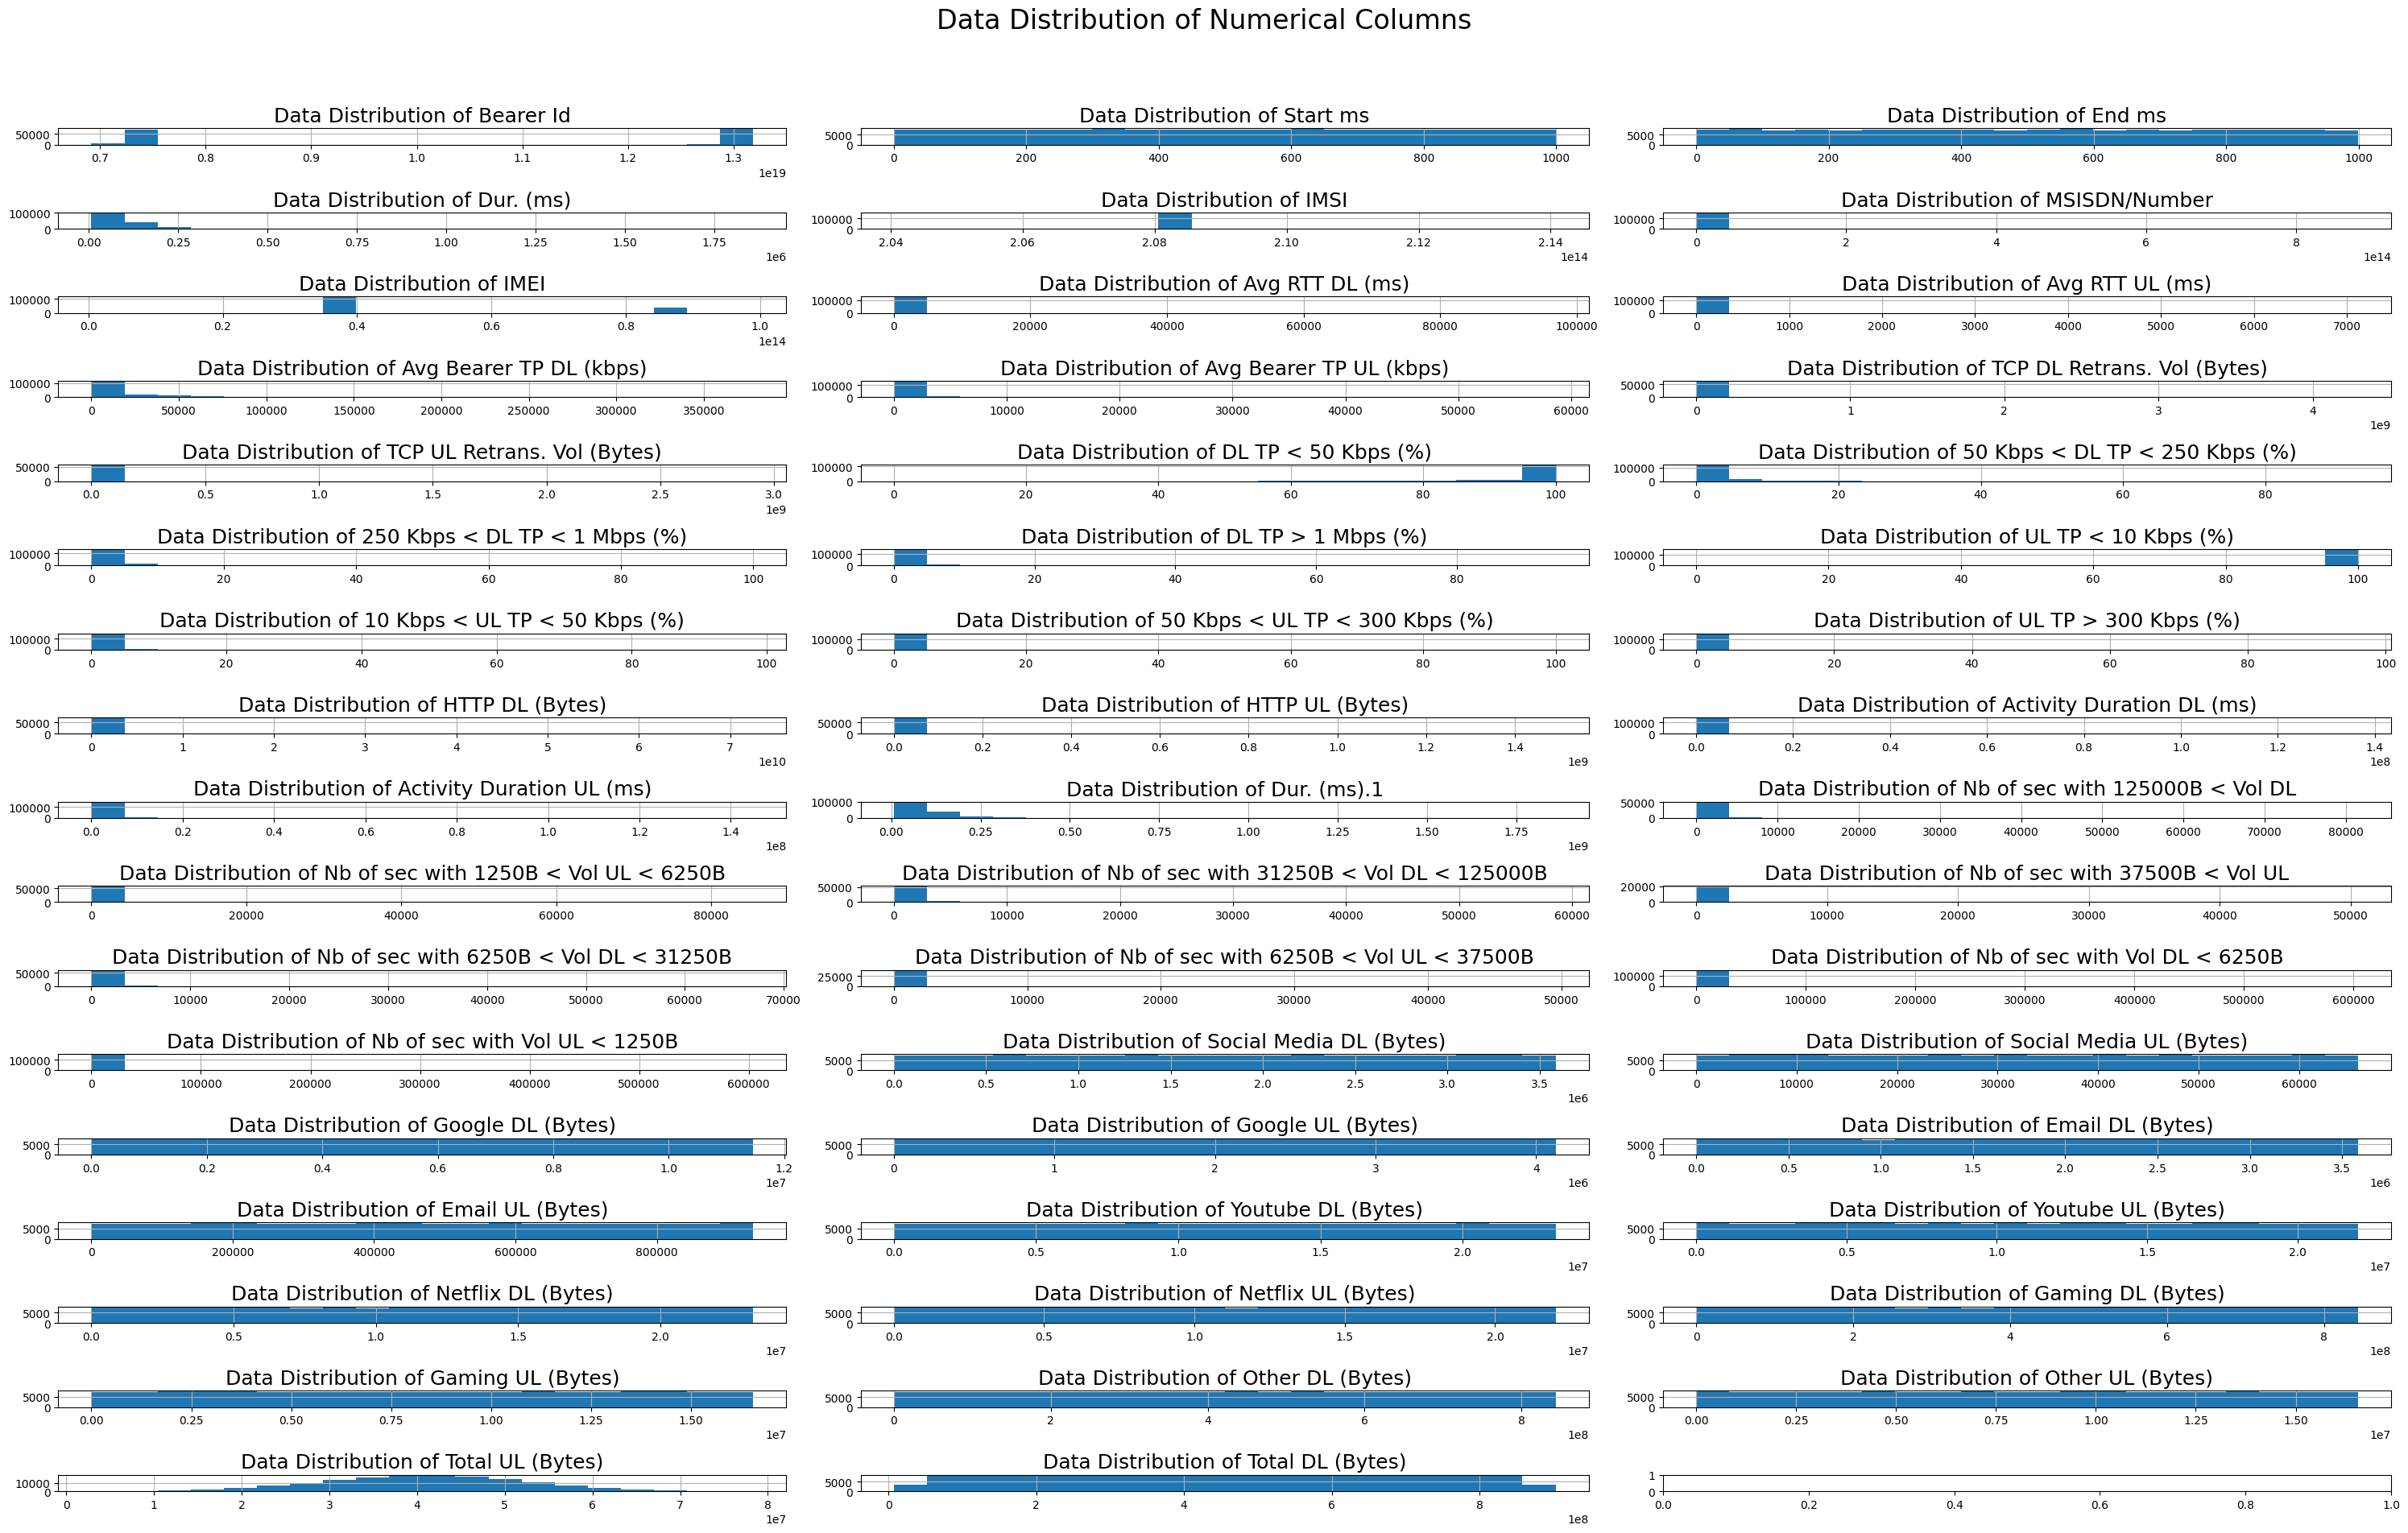

In [9]:
def plot_numerical_columns(numerical_cols):
    num_cols = numerical_cols.columns
    num_columns = len(num_cols)
    max_subplots = 9  # Maximum number of subplots (3x3 grid)

    fig, axes = plt.subplots(3, min(num_columns, max_subplots // 3), figsize=(15, 10))

    for i, column in enumerate(num_cols[:max_subplots]):
        row = i // min(num_columns, max_subplots // 3)
        col = i % min(num_columns, max_subplots // 3)
        numerical_cols[column].hist(ax=axes[row, col], bins=20)  # Plot histogram with specified bins
        axes[row, col].set_title(f'Data Distribution of {column}', fontsize=12)  # Set title

    # Adjust layout and show the plot
    plt.suptitle('Data Distribution of Numerical Columns', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust position of suptitle
    plt.show()

In [ ]:
plot_numerical_columns(numerical_cols)

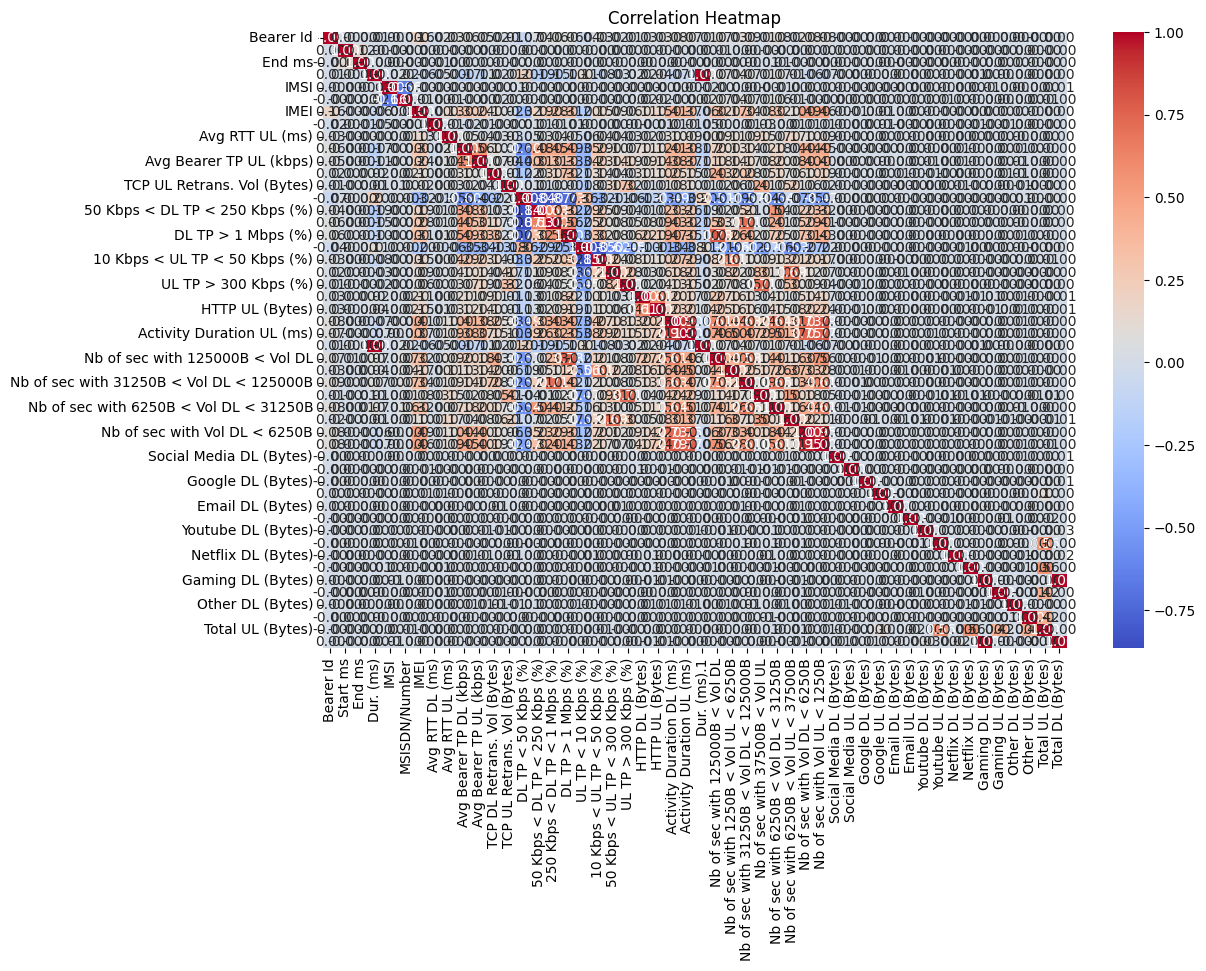

In [10]:
# Plot the correlation matrix as a heatmap
plot_heatmap(numerical_cols)

##### Categorical features

In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


<Figure size 800x600 with 0 Axes>

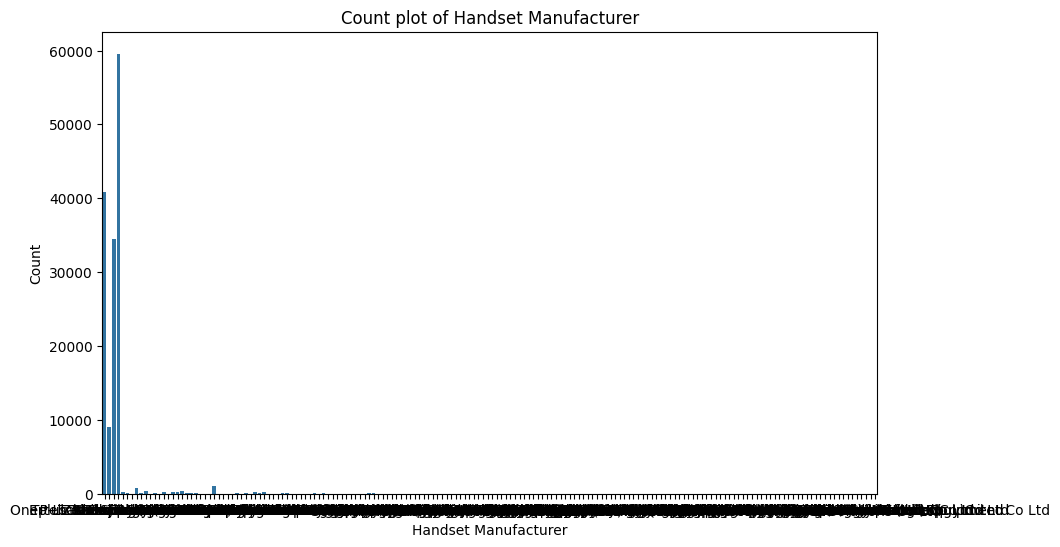

<Figure size 800x600 with 0 Axes>

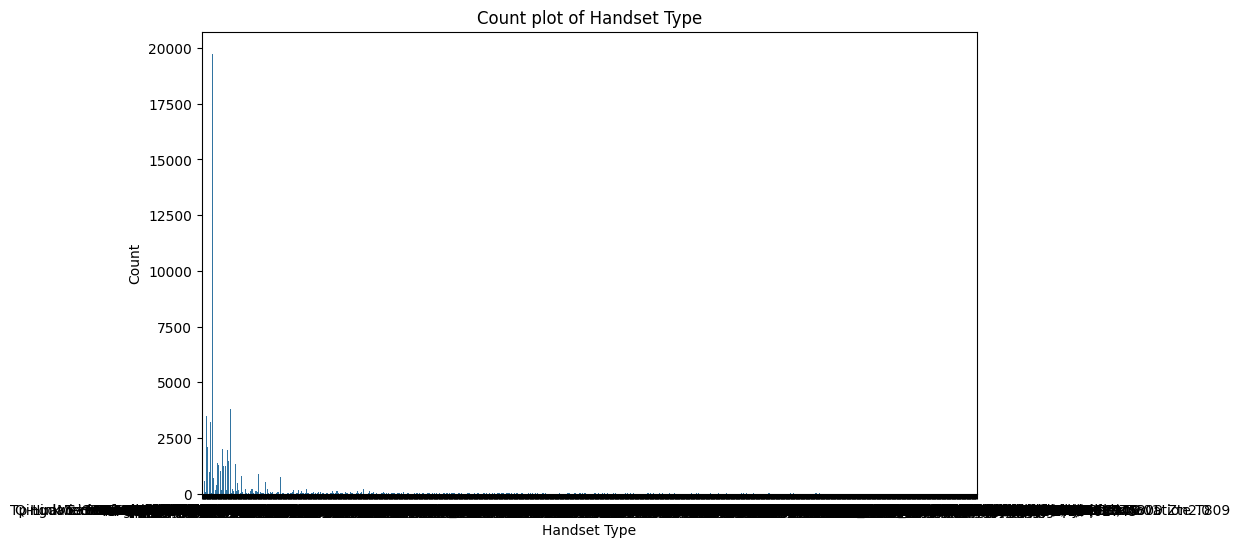

In [12]:
# Plot count plot for "Handset Manufacturer"
plt.figure(figsize=(8, 6))
plot_countplot(df, "Handset Manufacturer")

# Plot count plot for "Handset Type"
plt.figure(figsize=(8, 6))
plot_countplot(df, "Handset Type")

plt.show()

### User Overview Analysis

In [13]:
df['Handset Type'].head()

0     Samsung Galaxy A5 Sm-A520F
1    Samsung Galaxy J5 (Sm-J530)
2       Samsung Galaxy A8 (2018)
3                      undefined
4               Samsung Sm-G390F
Name: Handset Type, dtype: object

In [14]:
# Count the frequency of each handset
handset_usage = df['Handset Type'].value_counts()

# Sort the handsets based on usage frequency in descending order
sorted_handsets = handset_usage.sort_values(ascending=False)

# Select the top 10 handsets
top_10_handsets = sorted_handsets.head(10)

# Print the top 10 handsets
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [15]:

# Sort the handsets based on usage frequency in descending order
sorted_handsets = handset_usage.sort_values(ascending=False)

# Select the top 10 handsets
top_10_handsets = sorted_handsets.head(10)

# Calculate the total number of handsets
total_handsets = len(df['Handset Type'])

# Print the top 10 handsets with their frequencies and percentages
print("Top 10 Handsets Used by Customers:")
for handset, frequency in top_10_handsets.items():
    percentage = (frequency / total_handsets) * 100
    print(f"{handset}: {frequency} ({percentage:.2f}%)")

Top 10 Handsets Used by Customers:
Huawei B528S-23A: 19752 (13.17%)
Apple iPhone 6S (A1688): 9419 (6.28%)
Apple iPhone 6 (A1586): 9023 (6.02%)
undefined: 8987 (5.99%)
Apple iPhone 7 (A1778): 6326 (4.22%)
Apple iPhone Se (A1723): 5187 (3.46%)
Apple iPhone 8 (A1905): 4993 (3.33%)
Apple iPhone Xr (A2105): 4568 (3.05%)
Samsung Galaxy S8 (Sm-G950F): 4520 (3.01%)
Apple iPhone X (A1901): 3813 (2.54%)


In [16]:
# Count the frequency of each handset manufacturer
manufacturer_usage = df['Handset Manufacturer'].value_counts()

# Sort the manufacturers based on usage frequency in descending order
sorted_manufacturers = manufacturer_usage.sort_values(ascending=False)

# Select the top 3 handset manufacturers
top_3_manufacturers = sorted_manufacturers.head(3)

# Print the top 3 handset manufacturers
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [17]:
# Count the frequency of each handset manufacturer
manufacturer_usage = df['Handset Manufacturer'].value_counts()

# Sort the manufacturers based on usage frequency in descending order
sorted_manufacturers = manufacturer_usage.sort_values(ascending=False)

# Select the top 3 handset manufacturers
top_3_manufacturers = sorted_manufacturers.head(3)

# Calculate the total number of handsets
total_handsets = len(df['Handset Manufacturer'])

# Print the top 3 handset manufacturers with their frequencies and percentages
print("Top 3 Handset Manufacturers:")
for manufacturer, frequency in top_3_manufacturers.items():
    percentage = (frequency / total_handsets) * 100
    print(f"{manufacturer}: {frequency} ({percentage:.2f}%)")


Top 3 Handset Manufacturers:
Apple: 59565 (39.71%)
Samsung: 40839 (27.23%)
Huawei: 34423 (22.95%)


In [18]:
# Count the frequency of each handset for the top 3 manufacturers
top_3_manufacturers = manufacturer_usage.head(3).index.tolist()

# Iterate over the top 3 manufacturers
for manufacturer in top_3_manufacturers:
    # Filter DataFrame for the current manufacturer
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    
    # Count the frequency of each handset for the current manufacturer
    handset_usage = manufacturer_df['Handset Type'].value_counts()
    
    # Sort the handsets based on usage frequency in descending order
    sorted_handsets = handset_usage.sort_values(ascending=False)
    
    # Select the top 5 handsets for the current manufacturer
    top_5_handsets = sorted_handsets.head(5)
    
    # Print the top 5 handsets for the current manufacturer
    print(f"Top 5 Handsets for {manufacturer}:")
    print(top_5_handsets)
    print()
    

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64



In [19]:
# Count the frequency of each handset for the top 3 manufacturers
top_3_manufacturers = manufacturer_usage.head(3).index.tolist()

# Iterate over the top 3 manufacturers
for manufacturer in top_3_manufacturers:
    # Filter DataFrame for the current manufacturer
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    
    # Count the frequency of each handset for the current manufacturer
    handset_usage = manufacturer_df['Handset Type'].value_counts()
    
    # Sort the handsets based on usage frequency in descending order
    sorted_handsets = handset_usage.sort_values(ascending=False)
    
    # Select the top 5 handsets for the current manufacturer
    top_5_handsets = sorted_handsets.head(5)
    
    # Calculate the total number of handsets for the current manufacturer
    total_handsets_manufacturer = len(manufacturer_df['Handset Type'])
    
    # Print the top 5 handsets for the current manufacturer with their frequencies and percentages
    print(f"Top 5 Handsets for {manufacturer}:")
    for handset, frequency in top_5_handsets.items():
        percentage = (frequency / total_handsets_manufacturer) * 100
        print(f"{handset}: {frequency} ({percentage:.2f}%)")
    print()

Top 5 Handsets for Apple:
Apple iPhone 6S (A1688): 9419 (15.81%)
Apple iPhone 6 (A1586): 9023 (15.15%)
Apple iPhone 7 (A1778): 6326 (10.62%)
Apple iPhone Se (A1723): 5187 (8.71%)
Apple iPhone 8 (A1905): 4993 (8.38%)

Top 5 Handsets for Samsung:
Samsung Galaxy S8 (Sm-G950F): 4520 (11.07%)
Samsung Galaxy A5 Sm-A520F: 3724 (9.12%)
Samsung Galaxy J5 (Sm-J530): 3696 (9.05%)
Samsung Galaxy J3 (Sm-J330): 3484 (8.53%)
Samsung Galaxy S7 (Sm-G930X): 3199 (7.83%)

Top 5 Handsets for Huawei:
Huawei B528S-23A: 19752 (57.38%)
Huawei E5180: 2079 (6.04%)
Huawei P20 Lite Huawei Nova 3E: 2021 (5.87%)
Huawei P20: 1480 (4.30%)
Huawei Y6 2018: 997 (2.90%)



### User Behavior on the applications

In [19]:
# Group the DataFrame by 'MSISDN/Number' and count the number of xDR sessions for each user
sessions_per_user = df.groupby('MSISDN/Number')['Bearer Id'].count()

# Print the aggregated number of xDR sessions per user
print("Aggregated Number of xDR Sessions per User:")
print(sessions_per_user)

Aggregated Number of xDR Sessions per User:
MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64


In [20]:
# Convert 'Start' and 'End' columns to datetime objects
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate session durations in seconds
df['Session Duration (s)'] = (df['End'] - df['Start']).dt.total_seconds()

# Group the DataFrame by 'MSISDN/Number' and sum the session durations for each user
session_durations_per_user = df.groupby('MSISDN/Number')['Session Duration (s)'].sum()

# Print the aggregated session durations per user
print("Aggregated Session Durations per User:")
print(session_durations_per_user)

Aggregated Session Durations per User:
MSISDN/Number
3.360100e+10    116760.0
3.360100e+10    181260.0
3.360100e+10    135000.0
3.360101e+10     49920.0
3.360101e+10     37200.0
                  ...   
3.379000e+10      8760.0
3.379000e+10    141000.0
3.197021e+12    877380.0
3.370000e+14    253020.0
8.823971e+14    869820.0
Name: Session Duration (s), Length: 106856, dtype: float64


In [21]:
# Group the DataFrame by 'MSISDN/Number' and sum the download and upload data volumes for each user
total_data_per_user = df.groupby('MSISDN/Number').agg({'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'})

# Print the aggregated total download and upload data per user
print("Aggregated Total Download and Upload Data per User:")
print(total_data_per_user)

Aggregated Total Download and Upload Data per User:
               Total DL (Bytes)  Total UL (Bytes)
MSISDN/Number                                    
3.360100e+10       8.426375e+08        36053108.0
3.360100e+10       1.207552e+08        36104459.0
3.360100e+10       5.566597e+08        39306820.0
3.360101e+10       4.019932e+08        20327526.0
3.360101e+10       1.363130e+09        94280527.0
...                         ...               ...
3.379000e+10       6.879252e+08        26716429.0
3.379000e+10       4.445751e+08        35732243.0
3.197021e+12       1.948281e+08        37295915.0
3.370000e+14       5.396350e+08        56652839.0
8.823971e+14       7.869760e+07        60456049.0

[106856 rows x 2 columns]


In [22]:
# Select columns related to application data volumes
app_columns = [col for col in df.columns if 'DL (Bytes)' in col or 'UL (Bytes)' in col]

# Group the DataFrame by 'MSISDN/Number' and sum the data volumes for each application for each user
total_data_per_app_per_user = df.groupby('MSISDN/Number')[app_columns].sum()

# Print the aggregated total data volume per user for each application
print("Aggregated Total Data Volume per User for Each Application:")
print(total_data_per_app_per_user)

Aggregated Total Data Volume per User for Each Application:
               HTTP DL (Bytes)  HTTP UL (Bytes)  Social Media DL (Bytes)  \
MSISDN/Number                                                              
3.360100e+10               0.0              0.0                2206504.0   
3.360100e+10               0.0              0.0                2598548.0   
3.360100e+10               0.0              0.0                3148004.0   
3.360101e+10            8749.0            653.0                 251469.0   
3.360101e+10       185208098.0        4733818.0                2861230.0   
...                        ...              ...                      ...   
3.379000e+10          642945.0          86594.0                 234320.0   
3.379000e+10               0.0              0.0                 442214.0   
3.197021e+12               0.0              0.0                 668596.0   
3.370000e+14               0.0              0.0                 496337.0   
8.823971e+14               0